In [6]:
import import_ipynb
import preprocess_model
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, SimpleRNN, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Reshape


# Get data from preprocess_model


In [7]:
df = preprocess_model.df_rnn

# X_col = preprocess_model.X_col
# Country = preprocess_model.Country
# y_target = preprocess_model.y_target

# X_encoded = preprocess_model.X_encoded

# X_scaled = preprocess_model.X_scaled


# X = np.concatenate((X_encoded, X_scaled), axis=1)
# y = df[y_target]

X_train, X_val_test, y_train, y_val_test = preprocess_model.X_train_RNN, preprocess_model.X_val_test, preprocess_model.y_train_RNN, preprocess_model.y_val_test
X_val, X_test, y_val, y_test = preprocess_model.X_val_RNN, preprocess_model.X_test_RNN, preprocess_model.y_val_RNN, preprocess_model.y_test_RNN

X_col_train, X_num_train = preprocess_model.X_col_train, preprocess_model.X_num_train
X_col_val, X_num_val = preprocess_model.X_col_val, preprocess_model.X_num_val,
X_col_test, X_num_test = preprocess_model.X_col_test, preprocess_model.X_num_test


# Define model architecture

Epoch 1/20

15/15 [==============================] - 3s 36ms/step - loss: 9487.0254 - val_loss: 9262.3389
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 6584.7041 - val_loss: 7905.5093
Epoch 3/20
15/15 [==============================] - 0s 13ms/step - loss: 8320.0186 - val_loss: 8216.0312
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 5693.6646 - val_loss: 2672.1501
Epoch 5/20
15/15 [==============================] - 0s 13ms/step - loss: 1148.4016 - val_loss: 115.0312
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 324.1973 - val_loss: 277.1998
Epoch 7/20
15/15 [==============================] - 0s 13ms/step - loss: 141.0558 - val_loss: 85.6980
Epoch 8/20
15/15 [==============================] - 0s 14ms/step - loss: 86.3114 - val_loss: 49.0977
Epoch 9/20
15/15 [==============================] - 0s 14ms/step - loss: 46.4601 - val_loss: 35.9237
Epoch 10/20
15/15 [==============================] - 0s 13ms/step - 

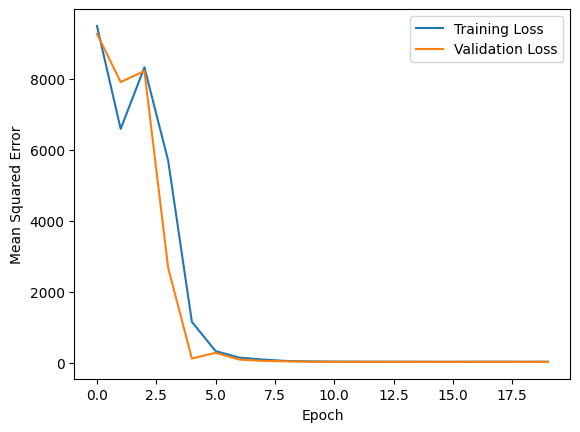

In [8]:
num_input = Input(shape=(X_num_train.shape[1], X_num_train.shape[2]))
rnn_layer = SimpleRNN(64, activation='relu')(num_input)

cat_input = Input(shape=(X_col_train.shape[1],))
cat_output = Dense(64, activation='relu')(cat_input)

concatenated = Concatenate()([rnn_layer, cat_output])
output = Dense(1)(concatenated)

model = Model(inputs=[num_input, cat_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_num_train, X_col_train], y_train, epochs=20, batch_size=64,
                    validation_data=([X_num_val, X_col_val], y_val), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_num_test, X_col_test], y_test)


# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [9]:
# Make predictions on the test set
predictions = model.predict([X_num_test, X_col_test])
print(predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


7/7 [==============================] - 0s 4ms/step
[[ 98.326515]
 [ 98.67774 ]
 [ 99.751755]
 [ 98.95698 ]
 [ 94.86869 ]
 [ 98.9685  ]
 [ 99.093346]
 [ 98.40351 ]
 [ 97.395805]
 [ 98.08958 ]
 [ 97.75807 ]
 [ 97.56362 ]
 [ 98.7546  ]
 [ 98.89268 ]
 [ 97.45436 ]
 [ 95.01575 ]
 [ 98.25315 ]
 [ 97.77817 ]
 [ 97.72244 ]
 [ 97.14431 ]
 [ 99.42423 ]
 [ 97.97438 ]
 [ 98.63207 ]
 [ 97.89414 ]
 [ 98.2932  ]
 [ 99.00338 ]
 [ 97.39341 ]
 [ 99.0164  ]
 [ 98.08755 ]
 [ 97.93128 ]
 [ 98.4463  ]
 [ 97.181786]
 [ 97.297806]
 [ 99.551796]
 [ 97.94999 ]
 [ 97.69137 ]
 [ 98.53504 ]
 [ 98.07328 ]
 [ 99.64031 ]
 [ 97.14853 ]
 [ 99.125565]
 [ 97.89155 ]
 [ 98.032585]
 [ 97.27958 ]
 [ 97.57399 ]
 [ 97.406105]
 [101.84384 ]
 [ 99.37805 ]
 [102.35313 ]
 [ 97.3258  ]
 [ 98.60641 ]
 [ 98.09353 ]
 [ 99.77929 ]
 [ 97.33648 ]
 [ 96.56878 ]
 [ 97.15154 ]
 [ 98.67968 ]
 [ 96.804054]
 [101.89727 ]
 [ 98.714645]
 [ 97.55457 ]
 [ 97.29203 ]
 [ 98.09086 ]
 [ 98.649796]
 [ 97.58555 ]
 [ 97.13467 ]
 [ 98.49334 ]
 [ 98.46437